In [1]:
import os
os.environ['J_NOTEBOOK'] = '1'


from preprocess.preprocess import *
import PARAMETERS

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from confusion_matrix_pretty_print import print_confusion_matrix

%matplotlib inline

In [2]:
PARAMETERS.LBP_METHOD = 'default'
PARAMETERS.METHOD = 'get_pyramid_dataset'
PARAMETERS.INTERPOLATION_ALGORITHM = 'lanczos'
PARAMETERS.BALANCE = False
PARAMETERS.N_SCALES = 1
PARAMETERS.GRAY_INTENSITY = False
PARAMETERS.X2SCALE = False
PARAMETERS.CHANNEL = None
PARAMETERS.DATASET = 'DRIVE'
PARAMETERS.FILE_EXTENSION = PARAMETERS.update_file_extension(PARAMETERS)
PARAMETERS.PLOT = True

pd.DataFrame({k: getattr(PARAMETERS, k) for k in VALID_PARAMETERS.keys()}, index=['Parameters']).head()

,LBP_METHOD,METHOD,INTERPOLATION_ALGORITHM,BALANCE,N_SCALES,GRAY_INTENSITY,X2SCALE
Parameters,default,get_pyramid_dataset,lanczos,False,1,False,False


## Cálculo con múltiples radios

Columns: Index(['default_1:1'], dtype='object')
['35_training.tif', '36_training.tif', '37_training.tif', '38_training.tif', '39_training.tif', '40_training.tif']


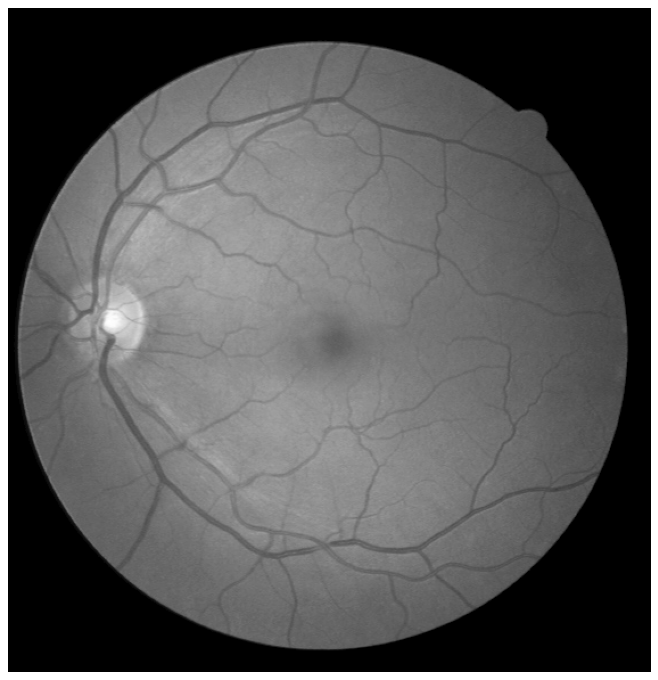

Accuracy score: 0.8714602625509372

F1 score: 0.0

Confusion matrix:

     t/p      0     1 
        0 1187545     0 
        1 175162     0 
Sensivity: 0.0
Specificity: 1.0


(0.871, 0.0, 1187545, 0, 175162, 0)

In [3]:
from main import main

PARAMETERS.N_SCALES = 1
PARAMETERS.X2SCALE = False
PARAMETERS.FILE_EXTENSION = PARAMETERS.update_file_extension(PARAMETERS)
main(lgb='Num', plot_once=True, validation=False)

In [12]:
import pandas as pd

def get_radius_features(n_scales):
    df_train = pd.DataFrame()
    df_test = pd.DataFrame()
    for r in range(2, n_scales + 1):
        db_path = f'../DB/{PARAMETERS.DATASET}/extra_features/radius/{r}'
        for filename in Path(db_path).glob('train_train_*'):   
            file_extension = \
                str(filename).replace('train_train_', '').split('/')[-1].replace('.pkl', '')
            if PARAMETERS.LBP_METHOD in file_extension:
                properties = file_extension.replace(
                    'get_pyramid_dataset', 'get-pyramid-dataset').replace(
                    'get_datasets_by_scale', 'get-dataset-by-scale').split('_')
                lbp_method = properties[0]
                df_train_temp = pd.read_pickle(filename, compression='gzip')
                df_test_temp = pd.read_pickle(str(filename).replace('train_train', 'train_test'), compression='gzip')
                df_train_temp = df_train_temp.drop(['Original', 'label'], axis=1)
                df_test_temp = df_test_temp.drop(['Original', 'label'], axis=1)
                df_train_temp.columns = [f'1:1_{lbp_method}_{r}']
                df_test_temp.columns = [f'1:1_{lbp_method}_{r}']
                df_train = pd.concat([df_train, df_train_temp], axis=1)
                df_test = pd.concat([df_test, df_test_temp], axis=1)
    return df_train, df_test

display(get_radius_features(6)[0].max())
display(get_radius_features(6))

1:1_default_2    6.553500e+04
1:1_default_3    1.677722e+07
1:1_default_4    2.147484e+09
1:1_default_5    2.147484e+09
1:1_default_6    2.147484e+09
dtype: float64

(        1:1_default_2  1:1_default_3  1:1_default_4  1:1_default_5  \
 0             65025.0     16769025.0      -131071.0     -2097151.0   
 1             65025.0     16769025.0      -131071.0     -2097151.0   
 2             65025.0     16769025.0      -131071.0     -2097151.0   
 3             65025.0     16769025.0      -131071.0     -2097151.0   
 4             65025.0     16769024.0      -131072.0     -2097151.0   
 ...               ...            ...            ...            ...   
 226537          510.0         8190.0       131070.0      2097150.0   
 226538          510.0         8190.0       131070.0      2097150.0   
 226539          510.0         8190.0       131070.0      2097150.0   
 226540          510.0         8190.0       131070.0      2097150.0   
 226541          510.0         8190.0       131070.0      2097150.0   
 
         1:1_default_6  
 0         -33554431.0  
 1         -33554431.0  
 2         -33554431.0  
 3         -33554431.0  
 4         -33554431.

Columns: Index(['default_1:1', '1:1_default_2'], dtype='object')
['35_training.tif', '36_training.tif', '37_training.tif', '38_training.tif', '39_training.tif', '40_training.tif']


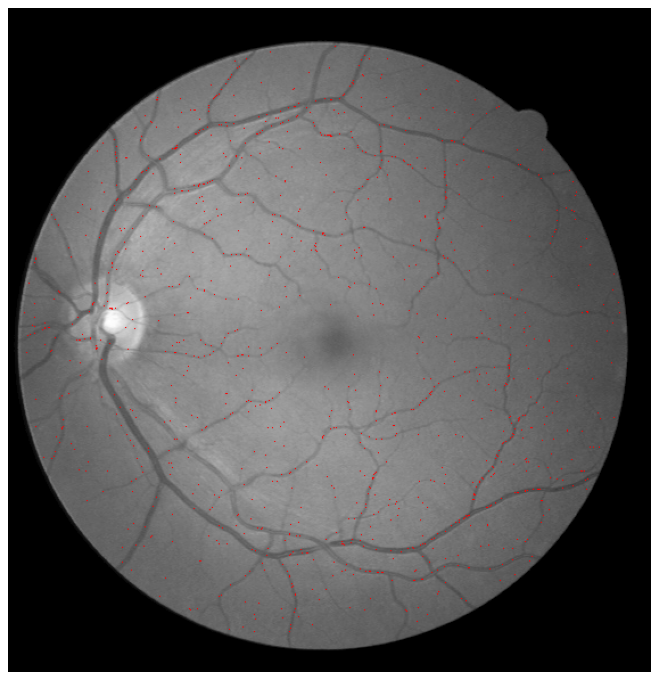

Accuracy score: 0.8723217830392006

F1 score: 0.043380727740573354

Confusion matrix:

     t/p      0     1 
        0 1184774  2771 
        1 171217  3945 
Sensivity: 0.022522008198125165
Specificity: 0.9976666147388099


(0.872, 0.043, 1184774, 2771, 171217, 3945)

In [6]:
radius_train, radius_test = get_radius_features(2)
main(lgb='Num', plot_once=True, extra_features={'train': radius_train, 'test': radius_test})

Columns: Index(['default_1:1', '1:1_default_2', '1:1_default_3'], dtype='object')
['35_training.tif', '36_training.tif', '37_training.tif', '38_training.tif', '39_training.tif', '40_training.tif']


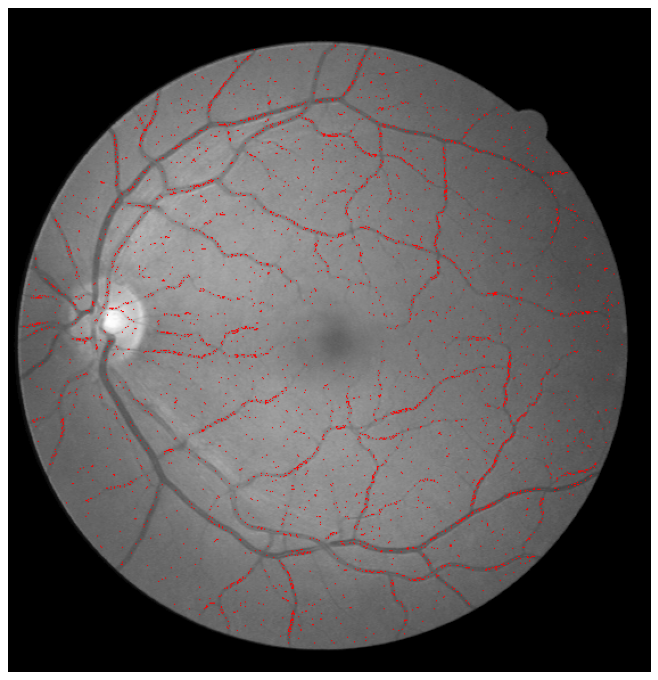

Accuracy score: 0.8761854162340107

F1 score: 0.16085345535025986

Confusion matrix:

     t/p      0     1 
        0 1177813  9732 
        1 158991 16171 
Sensivity: 0.0923202521094758
Specificity: 0.9918049421285088


(0.876, 0.161, 1177813, 9732, 158991, 16171)

In [7]:
radius_train, radius_test = get_radius_features(3)
main(lgb='Num', plot_once=True, extra_features={'train': radius_train, 'test': radius_test})

Columns: Index(['default_1:1', '1:1_default_2', '1:1_default_3', '1:1_default_4'], dtype='object')
['35_training.tif', '36_training.tif', '37_training.tif', '38_training.tif', '39_training.tif', '40_training.tif']


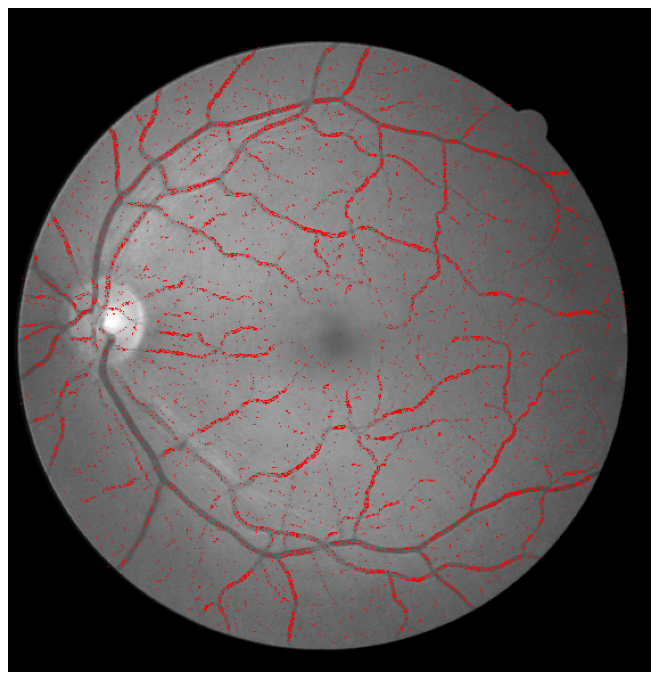

Accuracy score: 0.8821756988112631

F1 score: 0.29245033579524427

Confusion matrix:

     t/p      0     1 
        0 1168965 18580 
        1 141980 33182 
Sensivity: 0.1894360648999212
Specificity: 0.9843542771010783


(0.882, 0.292, 1168965, 18580, 141980, 33182)

In [8]:
radius_train, radius_test = get_radius_features(4)
main(lgb='Num', plot_once=True, extra_features={'train': radius_train, 'test': radius_test})

Columns: Index(['default_1:1', '1:1_default_2', '1:1_default_3', '1:1_default_4',
       '1:1_default_5'],
      dtype='object')
['35_training.tif', '36_training.tif', '37_training.tif', '38_training.tif', '39_training.tif', '40_training.tif']


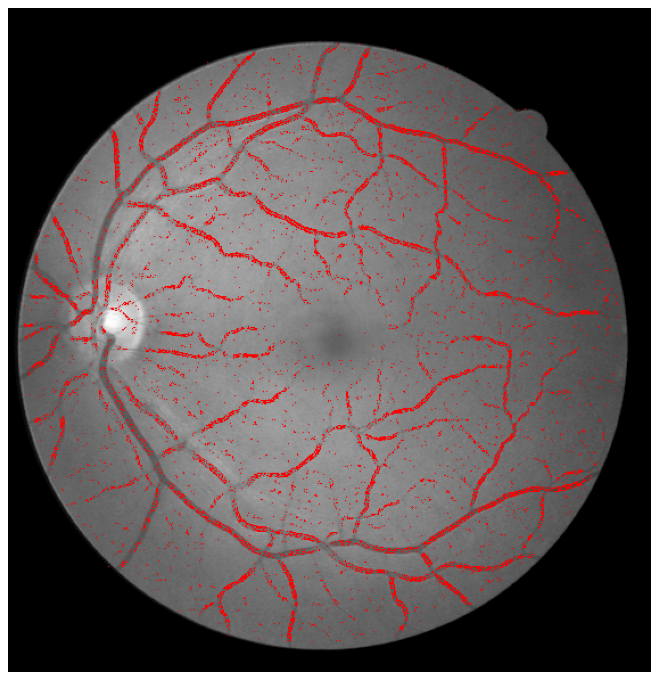

Accuracy score: 0.8903395961127374

F1 score: 0.4107197078737643

Confusion matrix:

     t/p      0     1 
        0 1161195 26350 
        1 123085 52077 
Sensivity: 0.2973076352176842
Specificity: 0.9778113671481923


(0.89, 0.411, 1161195, 26350, 123085, 52077)

In [10]:
radius_train, radius_test = get_radius_features(5)
main(lgb='Num', plot_once=True, extra_features={'train': radius_train, 'test': radius_test})

Columns: Index(['default_1:1', '1:1_default_2', '1:1_default_3', '1:1_default_4',
       '1:1_default_5', '1:1_default_6'],
      dtype='object')
['35_training.tif', '36_training.tif', '37_training.tif', '38_training.tif', '39_training.tif', '40_training.tif']


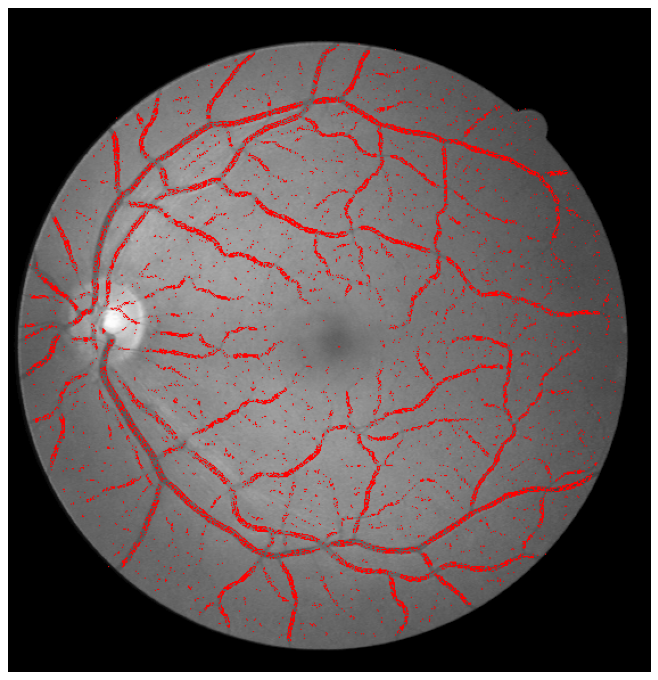

Accuracy score: 0.8965419565614619

F1 score: 0.4771494160797796

Confusion matrix:

     t/p      0     1 
        0 1157394 30151 
        1 110832 64330 
Sensivity: 0.3672600221509231
Specificity: 0.9746106463334021


(0.897, 0.477, 1157394, 30151, 110832, 64330)

In [11]:
radius_train, radius_test = get_radius_features(6)
main(lgb='Num', plot_once=True, extra_features={'train': radius_train, 'test': radius_test})